# Library Stuff


In [1]:
!pip install pyneuroml
!pip install libneuroml
import math
from neuroml import NeuroMLDocument
from neuroml import Cell
from neuroml import IonChannelHH
from neuroml import GateHHRates
from neuroml import BiophysicalProperties
from neuroml import MembraneProperties
from neuroml import ChannelDensity
from neuroml import HHRate
from neuroml import SpikeThresh
from neuroml import SpecificCapacitance
from neuroml import InitMembPotential
from neuroml import IntracellularProperties
from neuroml import IncludeType
from neuroml import Resistivity
from neuroml import Morphology, Segment, Point3DWithDiam
from neuroml import Network, Population
from neuroml import PulseGenerator, ExplicitInput
import numpy as np
from pyneuroml import pynml
from pyneuroml.lems import LEMSSimulation

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.2/27.2 MB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.1/372.1 kB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.9/492.9 kB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.7/283.7 kB 30.9 MB/s eta 0:00:00
  Created wheel for airspeed: filename=airspeed-0.5.20-py3-none-any.whl size=11603 sha256=80d306f6d38ed958dc6680c2c6504d6400e3fe4dc09d6b98cf0e794996c014b9
  Stored in directory: /root/.cache/pip/wheels/cf/3c/35/20c5a8887e9d8c40abf7eb9004fb29c4acc2f983d3cfa19b7a
Successfully built airspeed
Looki

# 8 Cell Network Simulation

In [2]:
# Simulation bits
sim_id = "hn8_network"
simulation = LEMSSimulation(sim_id=sim_id, duration=20000, dt=0.01, simulation_seed=123)

# Include the NeuroML model file
simulation.include_neuroml2_file("network.8.cell.nml")

# Assign target for the simulation
simulation.assign_simulation_target("net_8")

# Recording information from the simulation
simulation.create_output_file(id="display_vL", file_name=sim_id + "vL.dat")
simulation.add_column_to_output_file("display_vL", column_id="v1L", quantity="hn1L_pop[0]/v")
simulation.add_column_to_output_file("display_vL", column_id="v2L", quantity="hn2L_pop[0]/v")
simulation.add_column_to_output_file("display_vL", column_id="v3L", quantity="hn3L_pop[0]/v")
simulation.add_column_to_output_file("display_vL", column_id="v4L", quantity="hn4L_pop[0]/v")

simulation.create_output_file(id="display_vR", file_name=sim_id + "vR.dat")
simulation.add_column_to_output_file("display_vR", column_id="v1R", quantity="hn1R_pop[0]/v")
simulation.add_column_to_output_file("display_vR", column_id="v2R", quantity="hn2R_pop[0]/v")
simulation.add_column_to_output_file("display_vR", column_id="v3R", quantity="hn3R_pop[0]/v")
simulation.add_column_to_output_file("display_vR", column_id="v4R", quantity="hn4R_pop[0]/v")

# Save LEMS simulation to file
sim_file = simulation.save_to_file()

# Run the simulation using the default jNeuroML simulator
pynml.run_lems_with_jneuroml(sim_file, max_memory="2G", nogui=True, plot=False)

INFO:pyneuroml.pynml:Loading NeuroML2 file: /content/network.8.cell.nml
CRITICAL:pyneuroml.pynml:Unable to find file: /content/network.8.cell.nml!


SystemExit: ignored

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


### 8 Cell Network Data Plotted







pyNeuroML >>> Generating plot: Membrane potential (Left)
pyNeuroML >>> Saved image to hn8_network-vL.png of plot: Membrane potential (Left)
pyNeuroML >>> Generating plot: Membrane potential (Right)
pyNeuroML >>> Saved image to hn8_network-vR.png of plot: Membrane potential (Right)


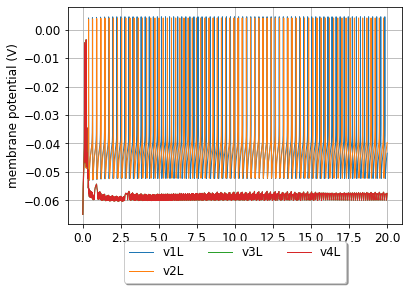

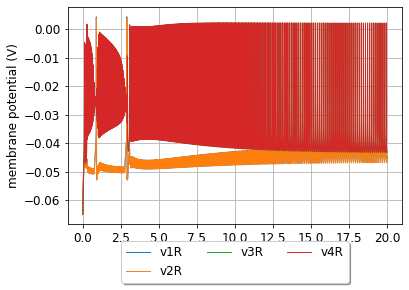

In [ ]:
# Left Cell Data
data_array = np.loadtxt(sim_id + "vL.dat")
pynml.generate_plot([data_array[:, 0], data_array[:, 0], data_array[:, 0], data_array[:, 0]],
                    [data_array[:, 1], data_array[:, 2], data_array[:, 3], data_array[:, 4]],
                    "Membrane potential (Left)", labels = ["v1L", "v2L", "v3L", "v4L"],
                    show_plot_already=False, save_figure_to=sim_id + "-vL.png", xaxis="time (s)",
                    yaxis="membrane potential (V)", grid=True)

# Right Cell Data
data_array = np.loadtxt(sim_id + "vR.dat")
pynml.generate_plot([data_array[:, 0], data_array[:, 0], data_array[:, 0], data_array[:, 0]],
                    [data_array[:, 1], data_array[:, 2], data_array[:, 3], data_array[:, 4]],
                    "Membrane potential (Right)", labels=["v1R", "v2R", "v3R", "v4R"],
                    show_plot_already=False, save_figure_to=sim_id + "-vR.png", xaxis="time (s)",
                    yaxis="membrane potential (V)", grid=True)

#### 8 Cell Network Data Plotted (4 Seconds)

pyNeuroML >>> Generating plot: Membrane potential (Left 4 sec)
pyNeuroML >>> Saved image to hn8_network-vL.png of plot: Membrane potential (Left 4 sec)
pyNeuroML >>> Generating plot: Membrane potential (Right 4 sec)
pyNeuroML >>> Saved image to hn8_network-vL.png of plot: Membrane potential (Right 4 sec)


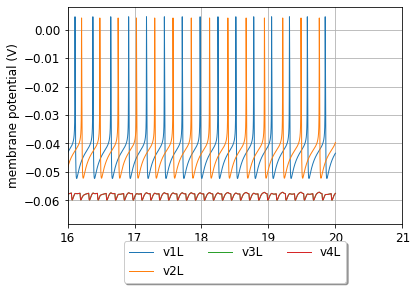

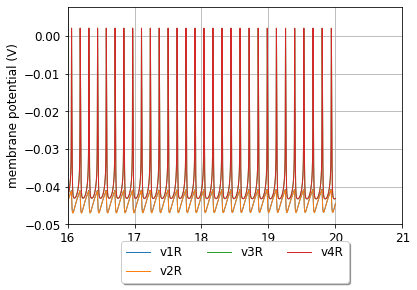

In [ ]:
# Left Cell Data
data_array = np.loadtxt(sim_id + "vL.dat")
pynml.generate_plot([data_array[:, 0], data_array[:, 0], data_array[:, 0], data_array[:, 0]],
                    [data_array[:, 1], data_array[:, 2], data_array[:, 3], data_array[:, 4]],
                    "Membrane potential (Left 4 sec)", labels = ["v1L", "v2L", "v3L", "v4L"],
                    show_plot_already=False, save_figure_to=sim_id + "-vL.png", xaxis="time (s)",
                    yaxis="membrane potential (V)", grid=True, xlim=16)

# Right Cell Data
data_array = np.loadtxt(sim_id + "vR.dat")
pynml.generate_plot([data_array[:, 0], data_array[:, 0], data_array[:, 0], data_array[:, 0]],
                    [data_array[:, 1], data_array[:, 2], data_array[:, 3], data_array[:, 4]],
                    "Membrane potential (Right 4 sec)", labels = ["v1R", "v2R", "v3R", "v4R"],
                    show_plot_already=False, save_figure_to=sim_id + "-vL.png", xaxis="time (s)",
                    yaxis="membrane potential (V)", grid=True, xlim=16, ylim=-.05)

# Experiment 1: Isolating Single cell (4L)

In [ ]:
# Simulation bits
sim_id = "exp_1"
simulation = LEMSSimulation(sim_id=sim_id, duration=20000, dt=0.01, simulation_seed=123)
nml_doc = pynml.read_neuroml2_file("network.8.cell.nml")

# Modifying nml_doc synaptic connections
#_<post>_<pre>_
# _3L_1L_
nml_doc.networks[0].projections[0].connection_wds[0].weight = 0
# _4L_1L_
nml_doc.networks[0].projections[1].connection_wds[0].weight = 0
# _3R_1R_
nml_doc.networks[0].projections[2].connection_wds[0].weight = 0
# _4R_1R_
nml_doc.networks[0].projections[3].connection_wds[0].weight = 0
# _3L_2L_
nml_doc.networks[0].projections[4].connection_wds[0].weight = 0
# _4L_2L_
nml_doc.networks[0].projections[5].connection_wds[0].weight = 0
# _3R_2R_
nml_doc.networks[0].projections[6].connection_wds[0].weight = 0
# _4R_2R_
nml_doc.networks[0].projections[7].connection_wds[0].weight = 0
# _1L_3L_
nml_doc.networks[0].projections[8].connection_wds[0].weight = 0
# _2L_3L_
nml_doc.networks[0].projections[9].connection_wds[0].weight = 0
# _1R_3R_
nml_doc.networks[0].projections[10].connection_wds[0].weight = 0
# _2R_3R_
nml_doc.networks[0].projections[11].connection_wds[0].weight = 0
# _1L_4L_
nml_doc.networks[0].projections[12].connection_wds[0].weight = 0
# _2L_4L_
nml_doc.networks[0].projections[13].connection_wds[0].weight = 0
# _1R_4R_
nml_doc.networks[0].projections[14].connection_wds[0].weight = 0
# _2R_4R_
nml_doc.networks[0].projections[15].connection_wds[0].weight = 0
# _3R_3L_
nml_doc.networks[0].projections[16].connection_wds[0].weight = 0
# _3L_3R_
nml_doc.networks[0].projections[17].connection_wds[0].weight = 0
# _4R_4L_
nml_doc.networks[0].projections[18].connection_wds[0].weight = 0
# _4L_4R_
nml_doc.networks[0].projections[19].connection_wds[0].weight = 0

pynml.write_neuroml2_file(nml2_doc=nml_doc, nml2_file_name="exp_1", validate=True)

# Include the NeuroML model file
simulation.include_neuroml2_file("exp_1")

# Assign target for the simulation
simulation.assign_simulation_target("net_8")

# Recording information from the simulation
simulation.create_output_file(id="display_vL", file_name=sim_id + "vL.dat")
simulation.add_column_to_output_file("display_vL", column_id="v4L", quantity="hn4L_pop[0]/v")

# Save LEMS simulation to file
sim_file = simulation.save_to_file()

# Run the simulation using the default jNeuroML simulator
pynml.run_lems_with_jneuroml(sim_file, max_memory="2G", nogui=True, plot=False)

pyNeuroML >>> Written LEMS Simulation exp_1 to file: LEMS_exp_1.xml


True

### Experiment 1 Data Plotted

pyNeuroML >>> Generating plot: Membrane potential (Left)
pyNeuroML >>> Saved image to exp_1-vL.png of plot: Membrane potential (Left)


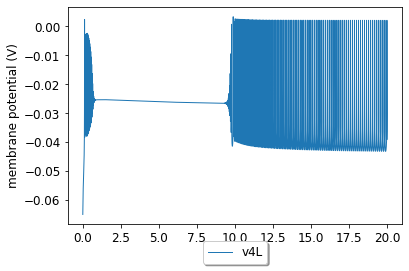

In [ ]:
data_array = np.loadtxt(sim_id + "vL.dat")
pynml.generate_plot([data_array[:, 0]], [data_array[:, 1]], "Membrane potential (Left)",
                    labels = ["v4L"], show_plot_already=False, save_figure_to=sim_id + "-vL.png",
                    xaxis="time (s)", yaxis="membrane potential (V)")

# Experiment 2: Two Network (4L to 4R)


In [ ]:
# Simulation bits
sim_id = "exp_2"
simulation = LEMSSimulation(sim_id=sim_id, duration=20000, dt=0.01, simulation_seed=123)
nml_doc = pynml.read_neuroml2_file("network.8.cell.nml")

# Modifying nml_doc synaptic connections
#_<post>_<pre>_
# _3L_1L_
nml_doc.networks[0].projections[0].connection_wds[0].weight = 0
# _4L_1L_
nml_doc.networks[0].projections[1].connection_wds[0].weight = 0
# _3R_1R_
nml_doc.networks[0].projections[2].connection_wds[0].weight = 0
# _4R_1R_
nml_doc.networks[0].projections[3].connection_wds[0].weight = 0
# _3L_2L_
nml_doc.networks[0].projections[4].connection_wds[0].weight = 0
# _4L_2L_
nml_doc.networks[0].projections[5].connection_wds[0].weight = 0
# _3R_2R_
nml_doc.networks[0].projections[6].connection_wds[0].weight = 0
# _4R_2R_
nml_doc.networks[0].projections[7].connection_wds[0].weight = 0
# _1L_3L_
nml_doc.networks[0].projections[8].connection_wds[0].weight = 0
# _2L_3L_
nml_doc.networks[0].projections[9].connection_wds[0].weight = 0
# _1R_3R_
nml_doc.networks[0].projections[10].connection_wds[0].weight = 0
# _2R_3R_
nml_doc.networks[0].projections[11].connection_wds[0].weight = 0
# _1L_4L_
nml_doc.networks[0].projections[12].connection_wds[0].weight = 0
# _2L_4L_
nml_doc.networks[0].projections[13].connection_wds[0].weight = 0
# _1R_4R_
nml_doc.networks[0].projections[14].connection_wds[0].weight = 0
# _2R_4R_
nml_doc.networks[0].projections[15].connection_wds[0].weight = 0
# _3R_3L_
nml_doc.networks[0].projections[16].connection_wds[0].weight = 0
# _3L_3R_
nml_doc.networks[0].projections[17].connection_wds[0].weight = 0
# _4R_4L_
nml_doc.networks[0].projections[18].connection_wds[0].weight = 1
# _4L_4R_
nml_doc.networks[0].projections[19].connection_wds[0].weight = 1

pynml.write_neuroml2_file(nml2_doc=nml_doc, nml2_file_name=sim_id, validate=True)

# Include the NeuroML model file
simulation.include_neuroml2_file(sim_id)

# Assign target for the simulation
simulation.assign_simulation_target("net_8")

# Recording information from the simulation
simulation.create_output_file(id="display_vL", file_name=sim_id + "vL.dat")
simulation.add_column_to_output_file("display_vL", column_id="v4L", quantity="hn4L_pop[0]/v")

simulation.create_output_file(id="display_vR", file_name=sim_id + "vR.dat")
simulation.add_column_to_output_file("display_vR", column_id="v4R", quantity="hn4R_pop[0]/v")

# Save LEMS simulation to file
sim_file = simulation.save_to_file()

# Run the simulation using the default jNeuroML simulator
pynml.run_lems_with_jneuroml(sim_file, max_memory="2G", nogui=True, plot=False)

pyNeuroML >>> Written LEMS Simulation exp_2 to file: LEMS_exp_2.xml


True

### Experiment 2 Data Plotted

pyNeuroML >>> Generating plot: Membrane potential (Left)
pyNeuroML >>> Saved image to exp_2-vL.png of plot: Membrane potential (Left)
pyNeuroML >>> Generating plot: Membrane potential (Right)
pyNeuroML >>> Saved image to exp_2-vR.png of plot: Membrane potential (Right)


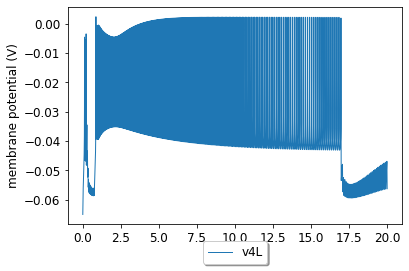

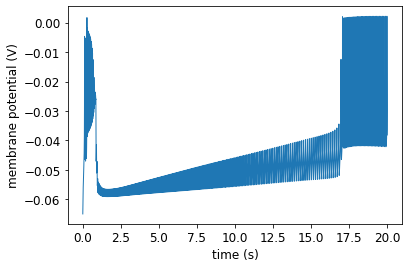

In [ ]:
# Left Cell
data_array = np.loadtxt(sim_id + "vL.dat")
pynml.generate_plot([data_array[:, 0]], [data_array[:, 1]], "Membrane potential (Left)",
                    labels = ["v4L"], show_plot_already=False, save_figure_to=sim_id + "-vL.png",
                    xaxis="time (s)", yaxis="membrane potential (V)")

# Right Cell
data_array = np.loadtxt(sim_id + "vR.dat")
pynml.generate_plot([data_array[:, 0]], [data_array[:, 1]], "Membrane potential (Right)",
                    show_plot_already=False, save_figure_to=sim_id + "-vR.png",
                    xaxis="time (s)", yaxis="membrane potential (V)")